In [1]:
# weight decay (L2 regularization)
# example of high dimensional linear regression
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [3]:
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

In [4]:
# penalty from L2 norm
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

In [8]:
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                                       d2l.evaluate_loss(net, test_iter, loss)))
    print("w's L2 norm is: ", torch.norm(w).item())

w's L2 norm is:  12.341368675231934


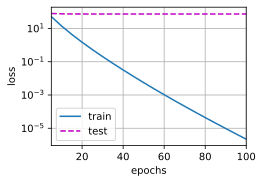

In [9]:
# ignore regularization
train(0)

w's L2 norm is:  0.35599982738494873


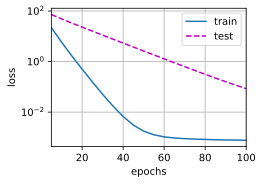

In [10]:
train(3)
'''
the introduce of the ||w||^2, which is the L2 norm of w, is to decrease the probability of the over fitting.
the first item of the new loss, the traditional loss function l(w, b), is trying to pull the model to the lowest point (minium point) of the whole parameter space, while the ||w||^2 trying to pull the model back to the origin place
in the end of the training, the effects of l(w,b) and ||w||^2 should counterbalance each other and the model reaches its balance point, while neither over fitting nor under fitting
'''

In [15]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003
    # we don't set the decay for bias as in most cases, the decay in bias is useless
    trainer = torch.optim.SGD([
        {"params": net[0].weight, 'weight_decay': wd},
        {"params": net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1,
                         (d2l.evaluate_loss(net, train_iter, loss),
                         d2l.evaluate_loss(net, test_iter, loss)))
        print("w's L2 norm is: ", net[0].weight.norm().item())

w's L2 norm is:  13.93802261352539


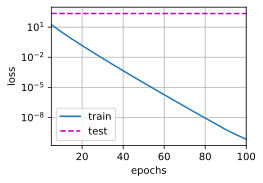

In [16]:
train_concise(0)

w's L2 norm is:  0.3996661305427551


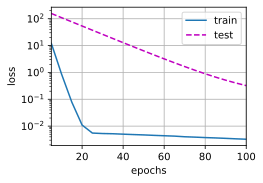

In [17]:
train_concise(3)